<a href="https://colab.research.google.com/github/rawleyperetz/DeepLearningPython/blob/main/FFNmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


In [ ]:
mnist_data = keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist_data.load_data()
print(x_train.shape, y_train.shape)
print(type(x_train))
#print(x_train[0])

(60000, 28, 28) (60000,)
<class 'numpy.ndarray'>


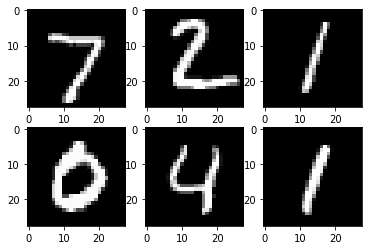

In [ ]:
import matplotlib.pyplot as plt
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(x_test[i],cmap='gray')

plt.show()

In [ ]:
# normalizing data
x_train, x_test = x_train/255.0, x_test/255.0

In [ ]:
from keras.api._v2.keras import activations
# using Sequential for the feed-forward
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10),
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
from keras import optimizers
# loss and optimizer
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = keras.optimizers.Adam(learning_rate=0.001)
metrics = ["accuracy"]

model.compile(loss=loss, optimizer=optim, metrics=metrics)

In [ ]:
# training
batch_size = 64
epochs = 5
model.fit(x_train,y_train,batch_size=batch_size, epochs=epochs, verbose=True, shuffle=2)

Epoch 1/5
938/938 [==============================] - 6s 6ms/step - loss: 0.2978 - accuracy: 0.9171
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.1334 - accuracy: 0.9619
Epoch 3/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0951 - accuracy: 0.9723
Epoch 4/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0727 - accuracy: 0.9789
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0576 - accuracy: 0.9827


In [ ]:
# evaluation
model.evaluate(x_test,y_test,batch_size=batch_size, verbose=2)

157/157 - 1s - loss: 0.0872 - accuracy: 0.9717 - 834ms/epoch - 5ms/step


[0.0871962308883667, 0.9717000126838684]

In [ ]:
# predictions 
pred = model(x_test)
pred = tf.nn.softmax(pred)
pred0 = pred[0]
print(pred0)
label0 = np.argmax(pred0)
print(label0)

tf.Tensor(
[2.7540016e-06 8.3252836e-08 7.9837519e-05 2.1924560e-03 1.5504019e-09
 1.0620220e-05 3.2680424e-11 9.9768555e-01 1.7061826e-05 1.1751678e-05], shape=(10,), dtype=float32)
7


In [ ]:
pred05s = pred[0:5]
print(pred05s.shape)
label05s = np.argmax(pred05s, axis=1)
print(label05s)

(5, 10)
[7 2 1 0 4]
